In [1]:
import requests

In [2]:
%%time

string_bbox = '35,-11,60,25'

#get data from OSM using Overpass API
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name="France"][admin_level=2]->.searchArea;

(node["amenity"="ice_cream"](%s); 
way["amenity"="ice_cream"](%s);
rel["amenity"="ice_cream"](%s);
node["shop"="ice_cream"](%s); 
way["shop"="ice_cream"](%s);
rel["shop"="ice_cream"](%s);
);
out center;
""" % (tuple(6*[string_bbox]))

response = requests.get(overpass_url, params={'data': overpass_query})
dataFrance = response.json()

CPU times: user 192 ms, sys: 44.5 ms, total: 236 ms
Wall time: 1min 7s


In [3]:
import pandas as pd
from shapely.geometry import Point, Polygon
import geopandas as gpd


#convert json into dataframe
df_dict = {"id":[], "type": [], "lat":[], "lon": [],"name":[], "shop":[], "amenity":[]}

for element in dataFrance['elements']:
    df_dict["id"].append(element["id"])
    df_dict["type"].append(element["type"])
    
    for tag in ["name", "shop", "amenity"]:
        try:
            df_dict[tag].append(element["tags"][tag])
        except KeyError:
            df_dict[tag].append("") 
    if element["type"]=="node":
        df_dict["lat"].append(element["lat"])
        df_dict["lon"].append(element["lon"])
    else:
        df_dict["lat"].append(element["center"]["lat"])
        df_dict["lon"].append(element["center"]["lon"])
        
df = pd.DataFrame.from_dict(df_dict)

# convert into geodataframe
geometry = [Point(xy) for xy in zip(df['lon'].astype(float), df['lat'].astype(float))]
gdf_ice_cream = gpd.GeoDataFrame(df, crs = 'EPSG:4326', geometry = geometry)

(35.0, 60.0)

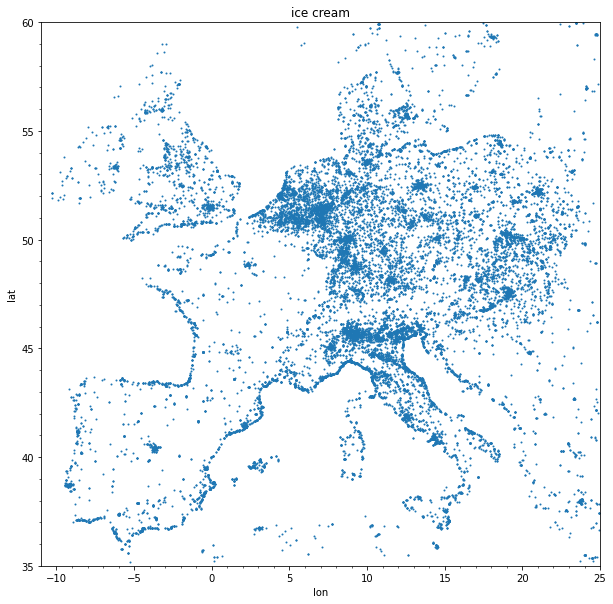

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.subplot(111,aspect=1.4)
plt.scatter( gdf_ice_cream['lon'] , gdf_ice_cream['lat'] ,s=1)
plt.xlabel('lon')
plt.ylabel('lat')
plt.minorticks_on()
plt.title('ice cream')

plt.xlim(int(string_bbox.split(',')[1]) , int(string_bbox.split(',')[3]) )
plt.ylim(int(string_bbox.split(',')[0]) , int(string_bbox.split(',')[2]) )

# Pubs

In [13]:
%%time

#get data from OSM using Overpass API
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];

(node["amenity"="pub"](%s); 
way["amenity"="pub"](%s);
rel["amenity"="pub"](%s);
);
out center;
""" % (tuple(3*[string_bbox]))

response = requests.get(overpass_url, params={'data': overpass_query})
dataFrance = response.json()

import pandas as pd
from shapely.geometry import Point, Polygon
import geopandas as gpd


#convert json into dataframe
df_dict = {"id":[], "type": [], "lat":[], "lon": [],"name":[], "shop":[], "amenity":[]}

for element in dataFrance['elements']:
    df_dict["id"].append(element["id"])
    df_dict["type"].append(element["type"])
    
    for tag in ["name", "shop", "amenity"]:
        try:
            df_dict[tag].append(element["tags"][tag])
        except KeyError:
            df_dict[tag].append("") 
    if element["type"]=="node":
        df_dict["lat"].append(element["lat"])
        df_dict["lon"].append(element["lon"])
    else:
        df_dict["lat"].append(element["center"]["lat"])
        df_dict["lon"].append(element["center"]["lon"])
        
df = pd.DataFrame.from_dict(df_dict)

# convert into geodataframe
geometry = [Point(xy) for xy in zip(df['lon'].astype(float), df['lat'].astype(float))]
gdf_pub = gpd.GeoDataFrame(df, crs = 'EPSG:4326', geometry = geometry)

CPU times: user 1.98 s, sys: 185 ms, total: 2.17 s
Wall time: 2min 43s


(35.0, 60.0)

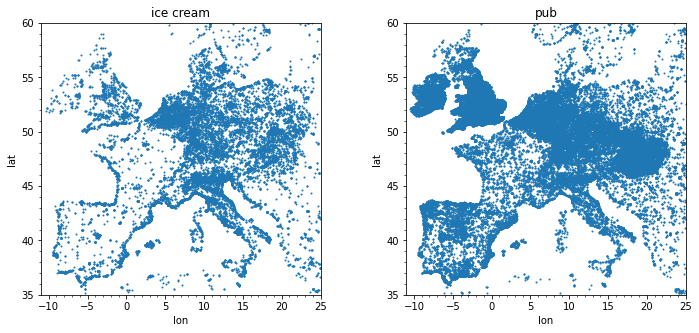

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(121,aspect=1.4)
plt.scatter( gdf_ice_cream['lon'] , gdf_ice_cream['lat'] ,s=1)
plt.xlabel('lon')
plt.ylabel('lat')
plt.minorticks_on()
plt.title('ice cream')
plt.xlim(int(string_bbox.split(',')[1]) , int(string_bbox.split(',')[3]) )
plt.ylim(int(string_bbox.split(',')[0]) , int(string_bbox.split(',')[2]) )

plt.subplot(122,aspect=1.4)
plt.scatter( gdf_pub['lon'] , gdf_pub['lat'] ,s=1)
plt.xlabel('lon')
plt.ylabel('lat')
plt.minorticks_on()
plt.title('pub')
plt.xlim(int(string_bbox.split(',')[1]) , int(string_bbox.split(',')[3]) )
plt.ylim(int(string_bbox.split(',')[0]) , int(string_bbox.split(',')[2]) )